# Diamond Dataset - Visualizing, Cleaning, Feature Engineering and Regression

<h3>Overview

We are given the dataset diamonds.csv which consists information about various features of number of diamonds and their price as labels. Our goal is to predict the prices of previous unseen diamonds using the features provided to us with highest accuracy 

<h3>Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<h3>Configuration Settings

In [2]:
%matplotlib inline
pd.set_option("display.max_columns", 100)

<h3>Loading the data

In [4]:
df = pd.read_csv('diamonds.csv', index_col = 0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<h3>Exploring and Cleaning the Data

In [6]:
df.shape

(53940, 10)

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<h4>Checking for any null values

In [10]:
df.isna().any().any()

False

<h4>Plotting the histogram

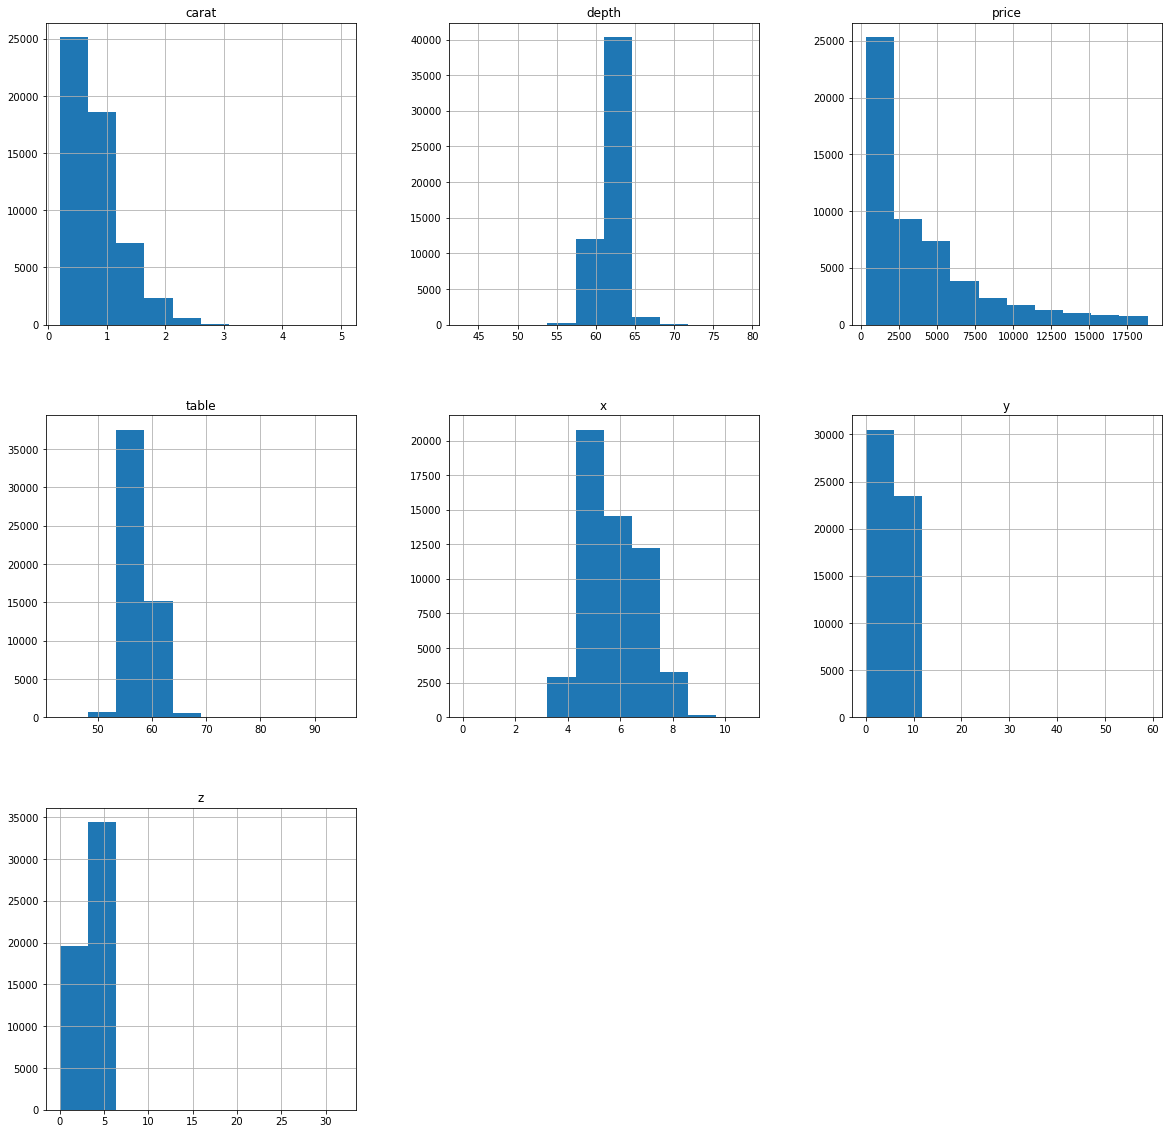

In [12]:
df.hist(figsize = (20, 20))
plt.show()

<h4>Count plots for categorical variables

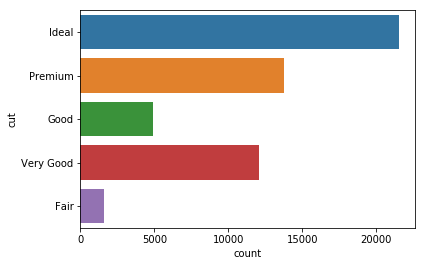

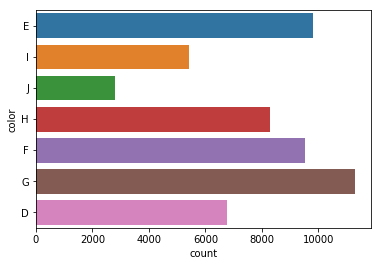

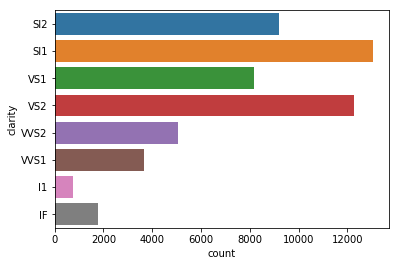

In [17]:
for feature in df.dtypes[df.dtypes == object].index:
    sns.countplot(y = feature, data = df)
    plt.show()

<h4>Box and Voilin plots for numerical features

/Users/ritik/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


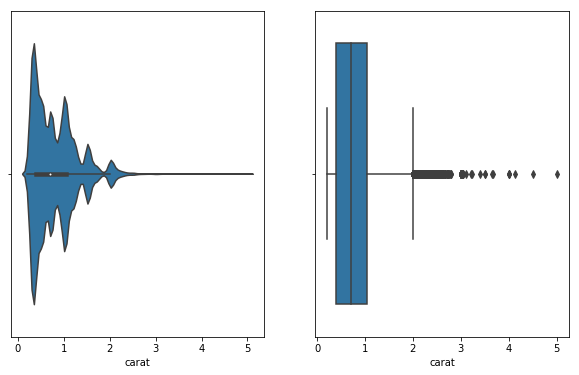

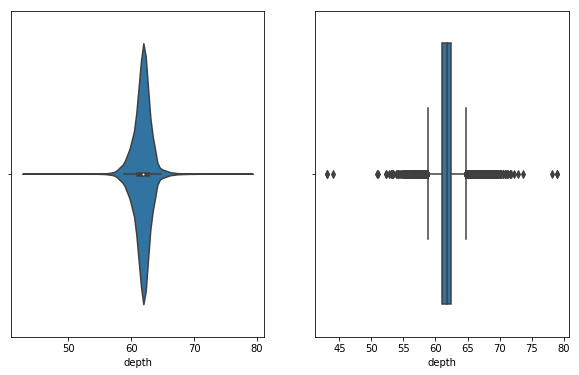

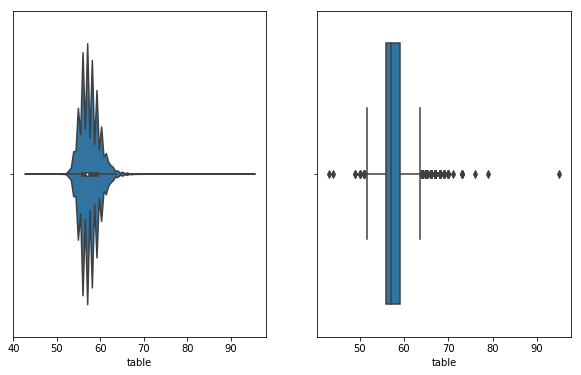

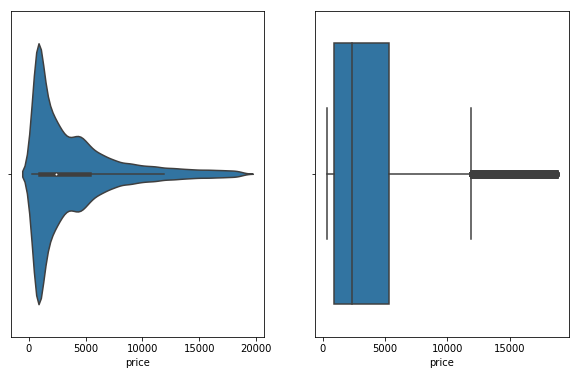

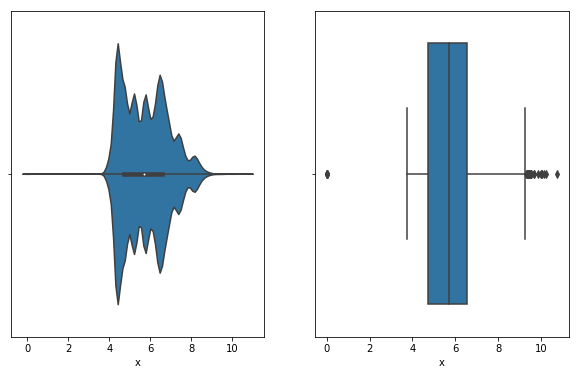

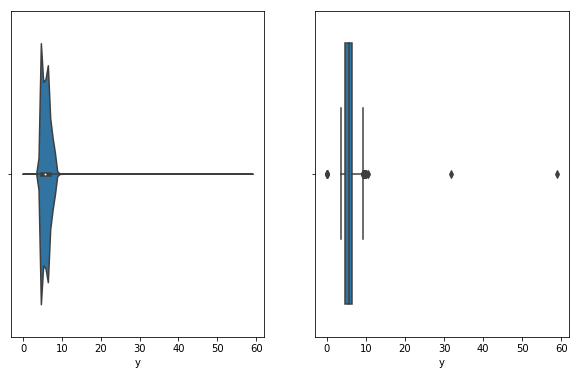

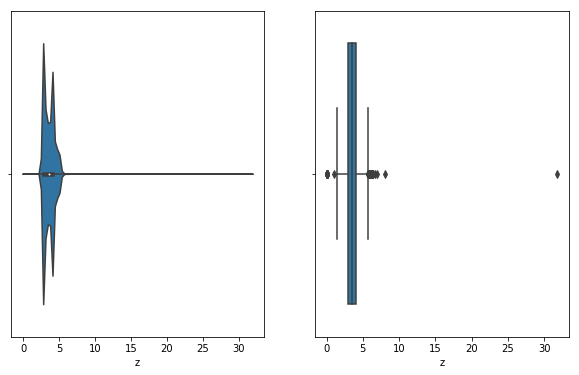

In [18]:
for feature in df.dtypes[df.dtypes != object].index:
    plt.figure(figsize = (10, 6))
    plt.subplot(1,2,1)
    sns.violinplot(x = feature, data = df)
    plt.subplot(1,2,2)
    sns.boxplot(x = feature, data = df)
    plt.show()

From the above boxplots, it can be concluded that x, y, z have value equal to zero in some instances which is not possible

In [20]:
pd.concat([df[df['x'] == 0], df[df['y'] == 0], df[df['z'] == 0]]).drop_duplicates()

,carat,cut,color,clarity,depth,table,price,x,y,z
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.0
26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.00,0.0
27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0


In [21]:
len(pd.concat([df[df['x'] == 0], df[df['y'] == 0], df[df['z'] == 0]]).drop_duplicates())

19

In [22]:
df.shape

(53940, 10)

Since, there are 53940 instances, so dropping 19 rows would not create any difference

In [24]:
df = df[(df[['x', 'y', 'z']] != 0).all(axis = 1)]

In [25]:
df[df['z'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z


<h4>Saving the cleaned data

In [27]:
df.to_csv('processed.csv', index = False)

<h3>Data Splits

In [45]:
X = df.drop(['price', 'cut', 'color', 'clarity'], axis = 1)
y = df.price

In [46]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, random_state = 0)

<h3>Model Selection

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
from sklearn.model_selection import GridSearchCV

<h4>Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
cv_scores = cross_val_score(clf, X_temp,y_temp, cv = 5)
print('Cross-validation accuracy', cv_scores)
print('Average accuracy',np.mean(cv_scores))

Cross-validation accuracy [0.82789077 0.85918524 0.86824101 0.85780332 0.85901536]
Average accuracy 0.8544271415046847


In [55]:
from sklearn.dummy import DummyRegressor
lm_dummy_mean = DummyRegressor(strategy = 'mean')
cv_scores = cross_val_score(lm_dummy_mean, X_temp, y_temp, cv = 5)
print('cross validation average accuracy (dummy)', np.mean(cv_scores))


cross validation average accuracy (dummy) -0.00034121423080297754


Since, there is a huge difference between average accuracy of Linear Regressor and Dummy Regression, it could be a good fit

<h4>Ridge Regression

In [65]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train, X_validate, y_train, y_validate = train_test_split(X_temp, y_temp)
X_trainer_scaled = scaler.fit_transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
clf = Ridge(alpha = 20).fit(X_train, y_train)

print('train accuracy: {:.2f}'.format(clf.score(X_train, y_train)))
print('test (validation) accuracy: {:.2f}'.format(clf.score(X_validate, y_validate)))

train accuracy: 0.86
test (validation) accuracy: 0.85
